## 1. Importacion de librerias, lectura de archivo y primeras visualizaciones.

In [1]:
#Importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Lectura del archivo
#ComprasFinal = pd.read_csv("/Users/Macbook/Downloads/InventoryDataset/PurchasesFINAL12312016.csv",sep=',')
#Lectura del archivo
ComprasFinal = pd.read_csv(r"C:\Users\Juan Daniel Bermudez\OneDrive\Escritorio\M6\DISLICORES\PurchasesFINAL12312016.csv",sep=',')

In [9]:
#Comprobamos la cantidad de registros 
np.shape (ComprasFinal)

(2372474, 16)

In [10]:
#Visualizamos las primeras 5 filas
ComprasFinal.head ()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [11]:
#Corroboramos el tipo de dato de las columnas
print (ComprasFinal.dtypes)

InventoryId        object
Store               int64
Brand               int64
Description        object
Size               object
VendorNumber        int64
VendorName         object
PONumber            int64
PODate             object
ReceivingDate      object
InvoiceDate        object
PayDate            object
PurchasePrice     float64
Quantity            int64
Dollars           float64
Classification      int64
dtype: object


In [12]:
#Verificamos la cantidad de datos nulos por columna
print(ComprasFinal.isnull().sum())

InventoryId       0
Store             0
Brand             0
Description       0
Size              3
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64


In [13]:
#Verificamos las filas con valores nulos
Compras_filas_nulas = ComprasFinal.isnull().any(axis=1)

#Mostramos las filas con valores nulos
Compras_filas_con_nulos = ComprasFinal [Compras_filas_nulas]

#Imprimimos las filas con valores nulos
if not Compras_filas_con_nulos.empty:
    print("Filas con valores nulos encontradas:")
    print(Compras_filas_con_nulos)
else:
    print("No se encontraron filas con valores nulos.")

Filas con valores nulos encontradas:
                 InventoryId  Store  Brand                 Description Size  \
1109668    34_PITMERDEN_3121     34   3121    Pinnacle Rainbow Sherbet  NaN   
1112426    34_PITMERDEN_5678     34   5678      Skinnygirl Pina Colada  NaN   
1116302  39_EASTHALLOW_15365     39  15365  Alabaster 07 Tinta de Toro  NaN   

         VendorNumber                   VendorName  PONumber      PODate  \
1109668         12546  JIM BEAM BRANDS COMPANY         10938  2016-06-27   
1112426         12546  JIM BEAM BRANDS COMPANY         10938  2016-06-27   
1116302          9552  M S WALKER INC                  10972  2016-06-29   

        ReceivingDate InvoiceDate     PayDate  PurchasePrice  Quantity  \
1109668    2016-07-04  2016-07-13  2016-08-16           6.93         7   
1112426    2016-07-09  2016-07-13  2016-08-16           6.93         6   
1116302    2016-07-07  2016-07-13  2016-08-21          91.83         1   

         Dollars  Classification  
1109668  

In [14]:
# Verificamos y contamos el número de filas duplicadas en una sola línea
num_filas_duplicadas = ComprasFinal.duplicated().sum()

# Mostramos el número de filas duplicadas
print(f'Número de filas duplicadas en la tabla Compras: {num_filas_duplicadas}')

# Si hay filas duplicadas, las mostramos
if num_filas_duplicadas > 0:
    print("Filas duplicadas en la tabla Compras:")
    print(ComprasFinal[ComprasFinal.duplicated()])

Número de filas duplicadas en la tabla Compras: 0


In [15]:
# Verificamos si hay valores negativos en las columnas numéricas
columns_with_negatives = ComprasFinal.select_dtypes(include='number').columns[
    (ComprasFinal.select_dtypes(include='number') < 0).any()].tolist()

# Imprimimos los resultados
if columns_with_negatives:
    print(f"Columnas con valores negativos: {columns_with_negatives}")
    for column in columns_with_negatives:
        print(f"\nValores negativos en la columna '{column}':")
        print(ComprasFinal[ComprasFinal[column] < 0])
else:
    print("No hay valores negativos en el DataFrame.")


No hay valores negativos en el DataFrame.


In [16]:
# Convertimos las columnas que tienen dato fecha al formato correcto

# Listamos las columnas a convertir
date_columns = ['PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate']

# Convertimos las columnas a formato datetime con un ciclo For
for col in date_columns:
    ComprasFinal[col] = pd.to_datetime(ComprasFinal[col], errors='coerce')

# Imprimimos para verificar los tipos de datos después de la conversión
print(ComprasFinal.dtypes)

# Imprimimos las primeras filas para verificar los datos después de la conversión
print(ComprasFinal[date_columns].head())

# Verificamos la cantidad de valores nulos en las columnas de fecha
print(ComprasFinal[date_columns].isnull().sum())

InventoryId               object
Store                      int64
Brand                      int64
Description               object
Size                      object
VendorNumber               int64
VendorName                object
PONumber                   int64
PODate            datetime64[ns]
ReceivingDate     datetime64[ns]
InvoiceDate       datetime64[ns]
PayDate           datetime64[ns]
PurchasePrice            float64
Quantity                   int64
Dollars                  float64
Classification             int64
dtype: object
      PODate ReceivingDate InvoiceDate    PayDate
0 2015-12-21    2016-01-02  2016-01-04 2016-02-16
1 2015-12-22    2016-01-01  2016-01-07 2016-02-21
2 2015-12-22    2016-01-02  2016-01-07 2016-02-21
3 2015-12-22    2016-01-01  2016-01-07 2016-02-21
4 2015-12-24    2016-01-02  2016-01-09 2016-02-16
PODate           0
ReceivingDate    0
InvoiceDate      0
PayDate          0
dtype: int64


## 2. Tratamiento de valores faltantes.

Notamos que hay 3 valores ausentes en un total de 2,372,474 registros, y dado que no es posible recuperar esa información, se decide eliminar estos 3 registros.


In [17]:
#Eliminamos las filas con nulls
ComprasFinal = ComprasFinal[ComprasFinal['Size'].notna()]

In [18]:
#Verificamos la cantidad de datos faltantes por columna
print(ComprasFinal.isnull().sum())

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64


In [19]:
#Comprobamos la cantidad de registros 
np.shape (ComprasFinal)

(2372471, 16)

## 3. Analisis explotario de los datos

El Análisis Exploratorio de Datos (EDA) es una fase fundamental en el proceso de análisis de datos. En esta etapa, nuestro objetivo es explorar y comprender los datos a fondo. Esto implica examinar y resumir las características clave de un conjunto de datos para obtener una visión clara de su estructura. El EDA emplea diversas técnicas y herramientas para identificar patrones y detectar valores atípicos.

Llevamos a cabo un análisis descriptivo de cada columna.

In [20]:
# Configuramos el formato de visualización para evitar notación científica y redondear a dos decimales
pd.options.display.float_format = '{:.2f}'.format

# Con un ciclo FOR, obtenemos medidas descriptivas básicas para entender mejor los datos
for i in ComprasFinal.columns:
    print(i)
    print(ComprasFinal[i].describe()) 
    print('------------------------')

InventoryId
count               2372471
unique               245906
top       73_DONCASTER_8068
freq                    180
Name: InventoryId, dtype: object
------------------------
Store
count   2372471.00
mean         44.65
std          23.51
min           1.00
25%          25.00
50%          48.00
75%          67.00
max          81.00
Name: Store, dtype: float64
------------------------
Brand
count   2372471.00
mean      12418.65
std       12557.28
min          58.00
25%        3639.00
50%        6523.00
75%       18877.00
max       90631.00
Name: Brand, dtype: float64
------------------------
Description
count                   2372471
unique                     9651
top       Tito's Handmade Vodka
freq                      16442
Name: Description, dtype: object
------------------------
Size
count     2372471
unique         51
top         750mL
freq      1207700
Name: Size, dtype: object
------------------------
VendorNumber
count   2372471.00
mean       6886.43
std        8066.70


In [21]:
# Contar la cantidad de pedidos por tienda y renombrar columnas
pedidos_por_tienda = ComprasFinal['Store'].value_counts().reset_index()
pedidos_por_tienda.columns = ['Tienda', 'Cantidad de Pedidos']

# Seleccionar las 10 tiendas con mayor cantidad de pedidos
top_tiendas = pedidos_por_tienda.head(10)

# Mostrar la tabla de las 10 tiendas con mayor cantidad de pedidos
print("Top 10 Tiendas con Mayor Cantidad de Pedidos:")
print(top_tiendas)


Top 10 Tiendas con Mayor Cantidad de Pedidos:
   Tienda  Cantidad de Pedidos
0      76               121123
1      73                96794
2      38                93412
3      34                92111
4      66                82699
5      67                69419
6      50                65512
7      69                63683
8      60                58169
9      41                53344


In [23]:
# Renombrar las columnas en el DataFrame 'ComprasFinal'
ComprasFinal.rename(columns={
    'Brand': 'BrandID',
    'PONumber': 'CompraID',  # Cambiar PONumber a CompraID como se muestra en el esquema
    'InventoryId': 'InventoryInicialID'  # Cambiar InventoryId a InventoryInicialID
}, inplace=True)

# Verificar los cambios
print(ComprasFinal.columns)

Index(['InventoryInicialID', 'Store', 'BrandID', 'Description', 'Size',
       'VendorNumber', 'VendorName', 'CompraID', 'PODate', 'ReceivingDate',
       'InvoiceDate', 'PayDate', 'PurchasePrice', 'Quantity', 'Dollars',
       'Classification'],
      dtype='object')


In [24]:
# Generamos el Top 10 compras mas grandes
top_compras = ComprasFinal[['BrandID', 'Description', 'PurchasePrice']].nlargest(10, 'PurchasePrice').reset_index(drop=True)
print("Top 10 Compras mas grandes:")
print(top_compras)


Top 10 Compras mas grandes:
   BrandID                   Description  PurchasePrice
0     3949     Patron En Lalique Tequila        5681.81
1     3949     Patron En Lalique Tequila        5681.81
2     3949     Patron En Lalique Tequila        5681.81
3     2367            Glenmorangie Pride        4264.70
4     2367            Glenmorangie Pride        4264.70
5      423       Hennessy Richard Cognac        3352.93
6      423       Hennessy Richard Cognac        3352.93
7      423       Hennessy Richard Cognac        3352.93
8     8385  Glenfiddich 1978 Rare Collct        2713.17
9     1251  Port Ellen 32 Yr Single Malt        2661.86


In [26]:
# Crear una copia del DataFrame original para el análisis
ComprasFinal_copia = ComprasFinal.copy()

# Verificar duplicados en la copia
print("Cantidad de duplicados en la copia del DataFrame:")
print(ComprasFinal_copia[['BrandID', 'Description', 'PurchasePrice']].duplicated().sum())

# Eliminar duplicados solo en la copia para el análisis del top 10
ComprasFinal_copia = ComprasFinal_copia[['BrandID', 'Description', 'PurchasePrice']].drop_duplicates()

# Generar el Top 10 Productos Más Costosos en la copia
top_costosos = ComprasFinal_copia.nlargest(10, 'PurchasePrice').reset_index(drop=True)

# Imprimir el Top 10 Productos Más Costosos
print("Top 10 Productos Más Costosos:")
print(top_costosos)

Cantidad de duplicados en la copia del DataFrame:
2361808
Top 10 Productos Más Costosos:
   BrandID                   Description  PurchasePrice
0     3949     Patron En Lalique Tequila        5681.81
1     2367            Glenmorangie Pride        4264.70
2      423       Hennessy Richard Cognac        3352.93
3     8385  Glenfiddich 1978 Rare Collct        2713.17
4     1251  Port Ellen 32 Yr Single Malt        2661.86
5     5795  Courvoisier L'Essence Cognac        2518.51
6      500        Remy Martin Louis XIII        2290.07
7     3255     Stolichnaya Elit Pristine        2222.21
8     4109     Hennessy Paradis Imperial        2109.37
9     1176   Brora 37 Yr Old Single Malt        1574.80


In [28]:
#Contamos cuantas celdas hay con precio=0 en la columna 'Purchaseprice
zero_price_count = (ComprasFinal['PurchasePrice'] == 0).sum()

#Imprimimos
print(f"Número de celdas con precio=0 en la columna 'PurchasePrice' es : {zero_price_count}")

Número de celdas con precio=0 en la columna 'PurchasePrice' es : 153


In [30]:
# Filtramos las filas donde 'PurchasePrice' es igual a 0
precio_cero_filas = ComprasFinal[ComprasFinal['PurchasePrice'] == 0]

# Verificar si son el mismo producto 
agrupacion_productos_cero = precio_cero_filas.groupby(['Description', 'BrandID', 'VendorNumber']).size().reset_index(name='count')

#Imprimimos
print(agrupacion_productos_cero)

                   Description  BrandID  VendorNumber  count
0  The Macallan Double Cask 12     2166          2561    153


In [31]:
# Verificamos las filas que contienen "The Macallan Double Cask 12" en la columna Description
filter_mask = ComprasFinal['Description'].str.contains("The Macallan Double Cask 12", na=False)

# Filas antes de la actualización
print("\nFilas antes de la actualización:")
print(ComprasFinal[filter_mask])

# Calculamos el valor medio de la columna PurchasePrice
mean_purchase_price = round(ComprasFinal['PurchasePrice'].mean(), 2)
print(f"\nValor medio de PurchasePrice: {mean_purchase_price}")

# Reemplazamos los valores en PurchasePrice para "The Macallan Double Cask 12" con el valor medio
ComprasFinal.loc[filter_mask, 'PurchasePrice'] = mean_purchase_price

# Verificamos las filas que contienen "The Macallan Double Cask 12" después del reemplazo
print("\nFilas después de la actualización:")
print(ComprasFinal[filter_mask])


Filas antes de la actualización:
            InventoryInicialID  Store  BrandID                  Description  \
1369009    59_CLAETHORPES_2166     59     2166  The Macallan Double Cask 12   
1369018      38_GOULCREST_2166     38     2166  The Macallan Double Cask 12   
1369031      34_PITMERDEN_2166     34     2166  The Macallan Double Cask 12   
1369032     44_PORTHCRAWL_2166     44     2166  The Macallan Double Cask 12   
1369033  56_BEGGAR'S HOLE_2166     56     2166  The Macallan Double Cask 12   
...                        ...    ...      ...                          ...   
2278896     39_EASTHALLOW_2166     39     2166  The Macallan Double Cask 12   
2278909      38_GOULCREST_2166     38     2166  The Macallan Double Cask 12   
2278922       9_BLACKPOOL_2166      9     2166  The Macallan Double Cask 12   
2278954    20_BREDWARDINE_2166     20     2166  The Macallan Double Cask 12   
2278958        31_HORNSEY_2166     31     2166  The Macallan Double Cask 12   

          Size  V

In [32]:
#Contamos cuantas celdas hay con precio=0 en la columna 'Purchaseprice para confirmar los cambios
precio_cero = (ComprasFinal['PurchasePrice'] == 0).sum()

#Imprimimos
print(f"Número de celdas con precio=0 en la columna 'PurchasePrice' es : {precio_cero}")

Número de celdas con precio=0 en la columna 'PurchasePrice' es : 0


In [35]:
# Contamos el número de proveedores únicos por producto
multiple_vendors = (
    ComprasFinal
    .groupby(['Description', 'BrandID'])['VendorNumber']
    .nunique()
    .reset_index(name='UniqueVendorCount')
)

# Filtramos productos que tienen más de un proveedor
multiple_vendors = multiple_vendors[multiple_vendors['UniqueVendorCount'] > 1]

# Imprimimos los resultados
print(multiple_vendors)


                        Description  BrandID  UniqueVendorCount
940    Benton Lane Pnt Gris Willamt    42801                  2
941          Benton Lane Pnt Nr Ore    31384                  2
1029                Big Peat Scotch     2717                  2
2593             Chocolate Shop Red    17754                  2
2627   Cigar Zin Old Vine Zinfandel    18771                  2
2910       Corner Creek Rsv Bourbon     2879                  2
4048   Flavor Essence Variety 5 Pak    90609                  2
5167    Jaboulet Cotes du Rhone Par     6692                  2
5169   Jaboulet Crozes Herm 10 Thal    11259                  2
5170    Jaboulet Crozes Hermitage L    26889                  2
5171   Jaboulet Cts Rhone Parl Rose    11089                  2
6021        Le Grande Courtage Brut    21860                  2
6022        Le Grande Courtage Brut    21959                  2
6024        Le Grande Courtage Rose    21960                  2
6138                  Linie Aquavit     

In [36]:
# Crear la nueva columna Detalle_compraID con valores incrementales desde 1
ComprasFinal['Detalle_compraID'] = range(1, len(ComprasFinal) + 1)

ComprasFinal.head()

,InventoryInicialID,Store,BrandID,Description,Size,VendorNumber,VendorName,CompraID,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,Detalle_compraID
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1,2
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1,3
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1,4
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1,5


Top 10 Productos Más Comprados:
   BrandID                   Description  PurchasePrice  Quantity
0     8111             Smirnoff 80 Proof           0.77    337660
1     1892                    Yukon Jack           0.72    254824
2     5111  Dr McGillicuddy's Mentholmnt           0.72    244654
3     3606      Smirnoff Raspberry Vodka           0.74    226085
4     6570  Kendall Jackson Chard Vt RSV           6.77    215668
5     4261        Capt Morgan Spiced Rum          16.17    201682
6     8068              Absolut 80 Proof          18.24    187407
7     3405         Tito's Handmade Vodka          23.19    164038
8     3837                    Skyy Vodka           0.72    163375
9     3102             Smirnoff Traveler          12.94    161386


C:\Users\Juan Daniel Bermudez\AppData\Local\Temp\ipykernel_35404\4176521341.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


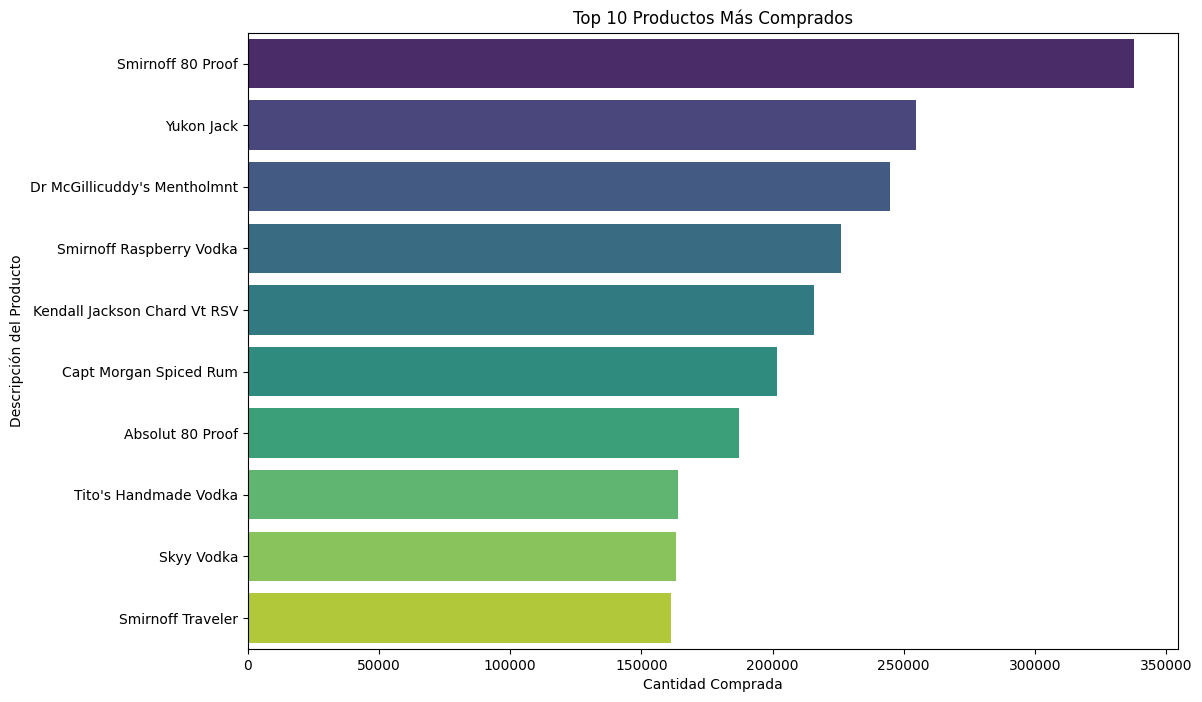

In [37]:
top_productos = (
    ComprasFinal
    .groupby(['BrandID', 'Description', 'PurchasePrice'])['Quantity']
    .sum()
    .nlargest(10)
    .reset_index()
)
print("Top 10 Productos Más Comprados:")
print(top_productos)

plt.figure(figsize=(12, 8))
sns.barplot(
    x='Quantity', 
    y='Description', 
    data=top_productos,
    palette='viridis'
)
plt.title('Top 10 Productos Más Comprados')
plt.xlabel('Cantidad Comprada')
plt.ylabel('Descripción del Producto')
plt.show()

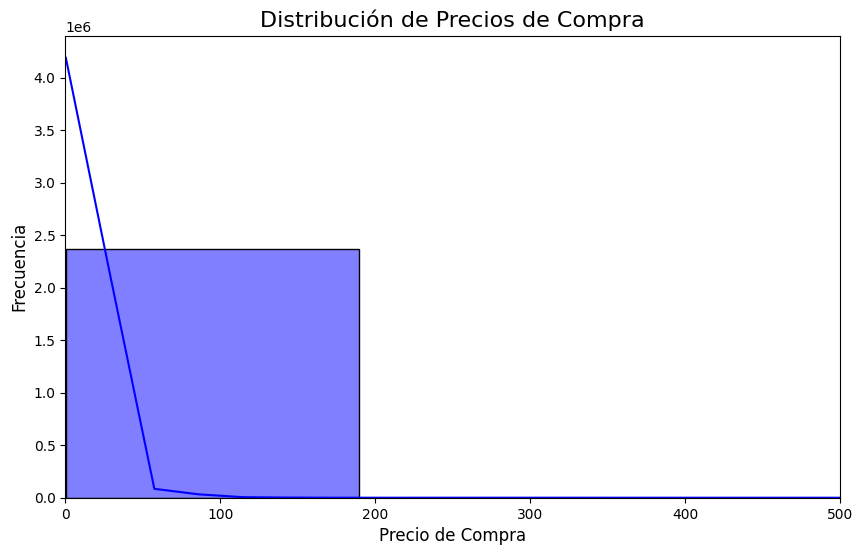

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de precios de compra
plt.figure(figsize=(10, 6))
sns.histplot(ComprasFinal['PurchasePrice'], bins=30, kde=True, color='blue')
plt.title('Distribución de Precios de Compra', fontsize=16)
plt.xlabel('Precio de Compra', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlim(0, 500)
plt.show()
#los precios van de 0-190

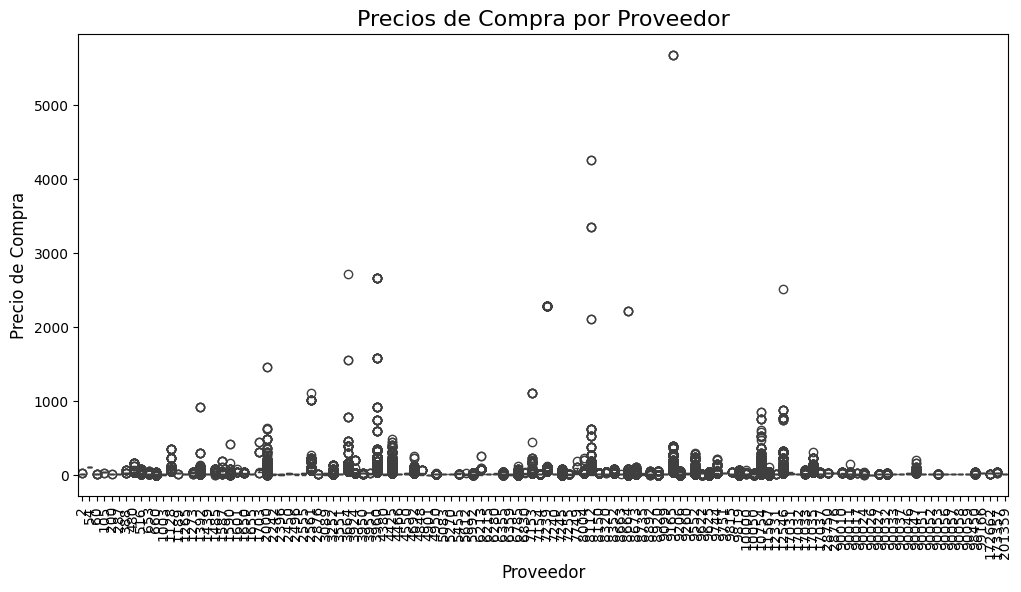

In [39]:
# Boxplot para mostrar la distribución de precios por proveedor (VendorNumber)
plt.figure(figsize=(12, 6))
sns.boxplot(x='VendorNumber', y='PurchasePrice', data=ComprasFinal)
plt.title('Precios de Compra por Proveedor', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Proveedor', fontsize=12)
plt.ylabel('Precio de Compra', fontsize=12)
plt.show()


C:\Users\Juan Daniel Bermudez\AppData\Local\Temp\ipykernel_35404\3745430746.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_order_counts.index, y=store_order_counts.values, palette='viridis')


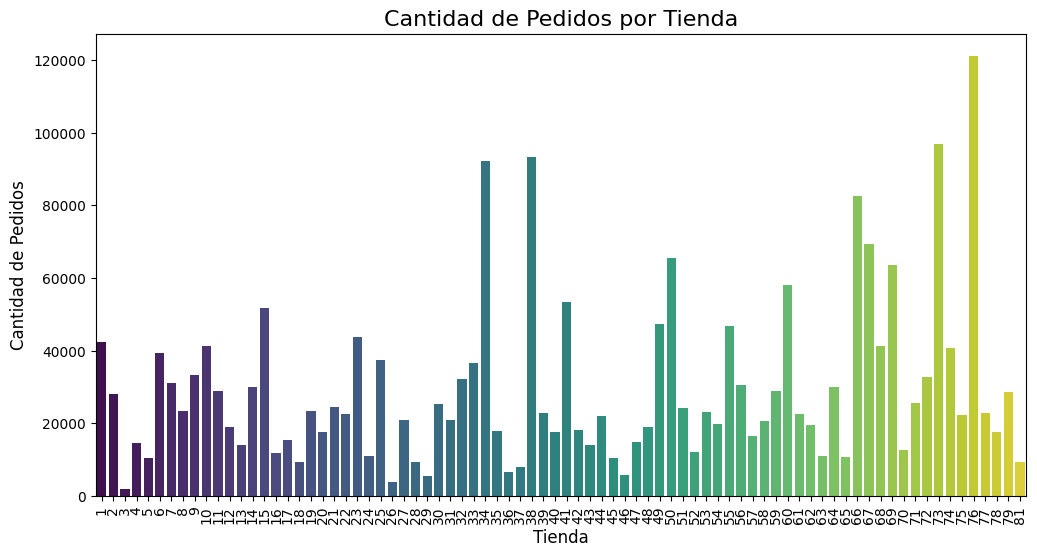

In [40]:
# Barplot de la cantidad de pedidos por tienda (Store)
plt.figure(figsize=(12, 6))
store_order_counts = ComprasFinal['Store'].value_counts()
sns.barplot(x=store_order_counts.index, y=store_order_counts.values, palette='viridis')
plt.title('Cantidad de Pedidos por Tienda', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Cantidad de Pedidos', fontsize=12)
plt.show()


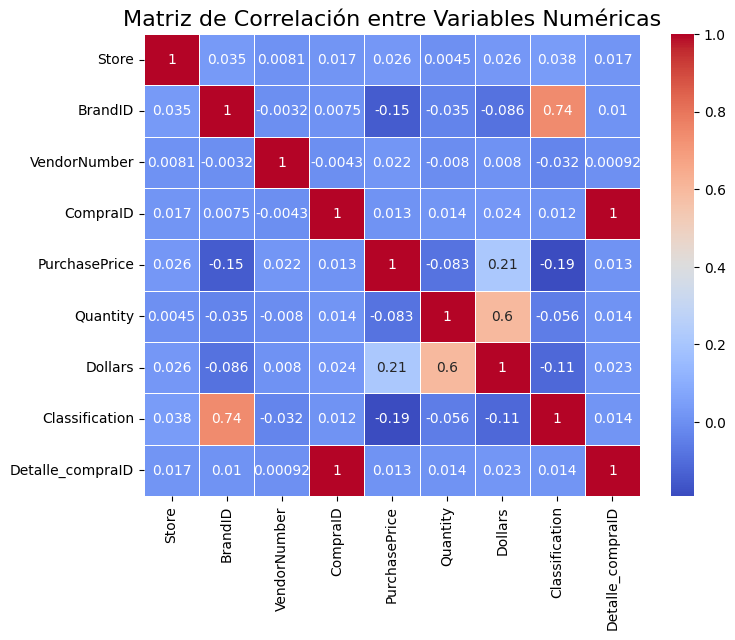

In [41]:
# Filtrar solo las columnas numéricas para la correlación
df_numeric = ComprasFinal.select_dtypes(include='number')

# Visualización de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
plt.show()


In [42]:
#Guardamos estos procesos en un nuevo CSV
ComprasFinal.to_csv('DetalleCompra.csv', index=False)

#Imprimimos mensaje de confirmacion
print("Archivo guardado exitosamente") 

Archivo guardado exitosamente
